# Task 1: Iris Flower Classification!

# Performed by Piyush Borhade


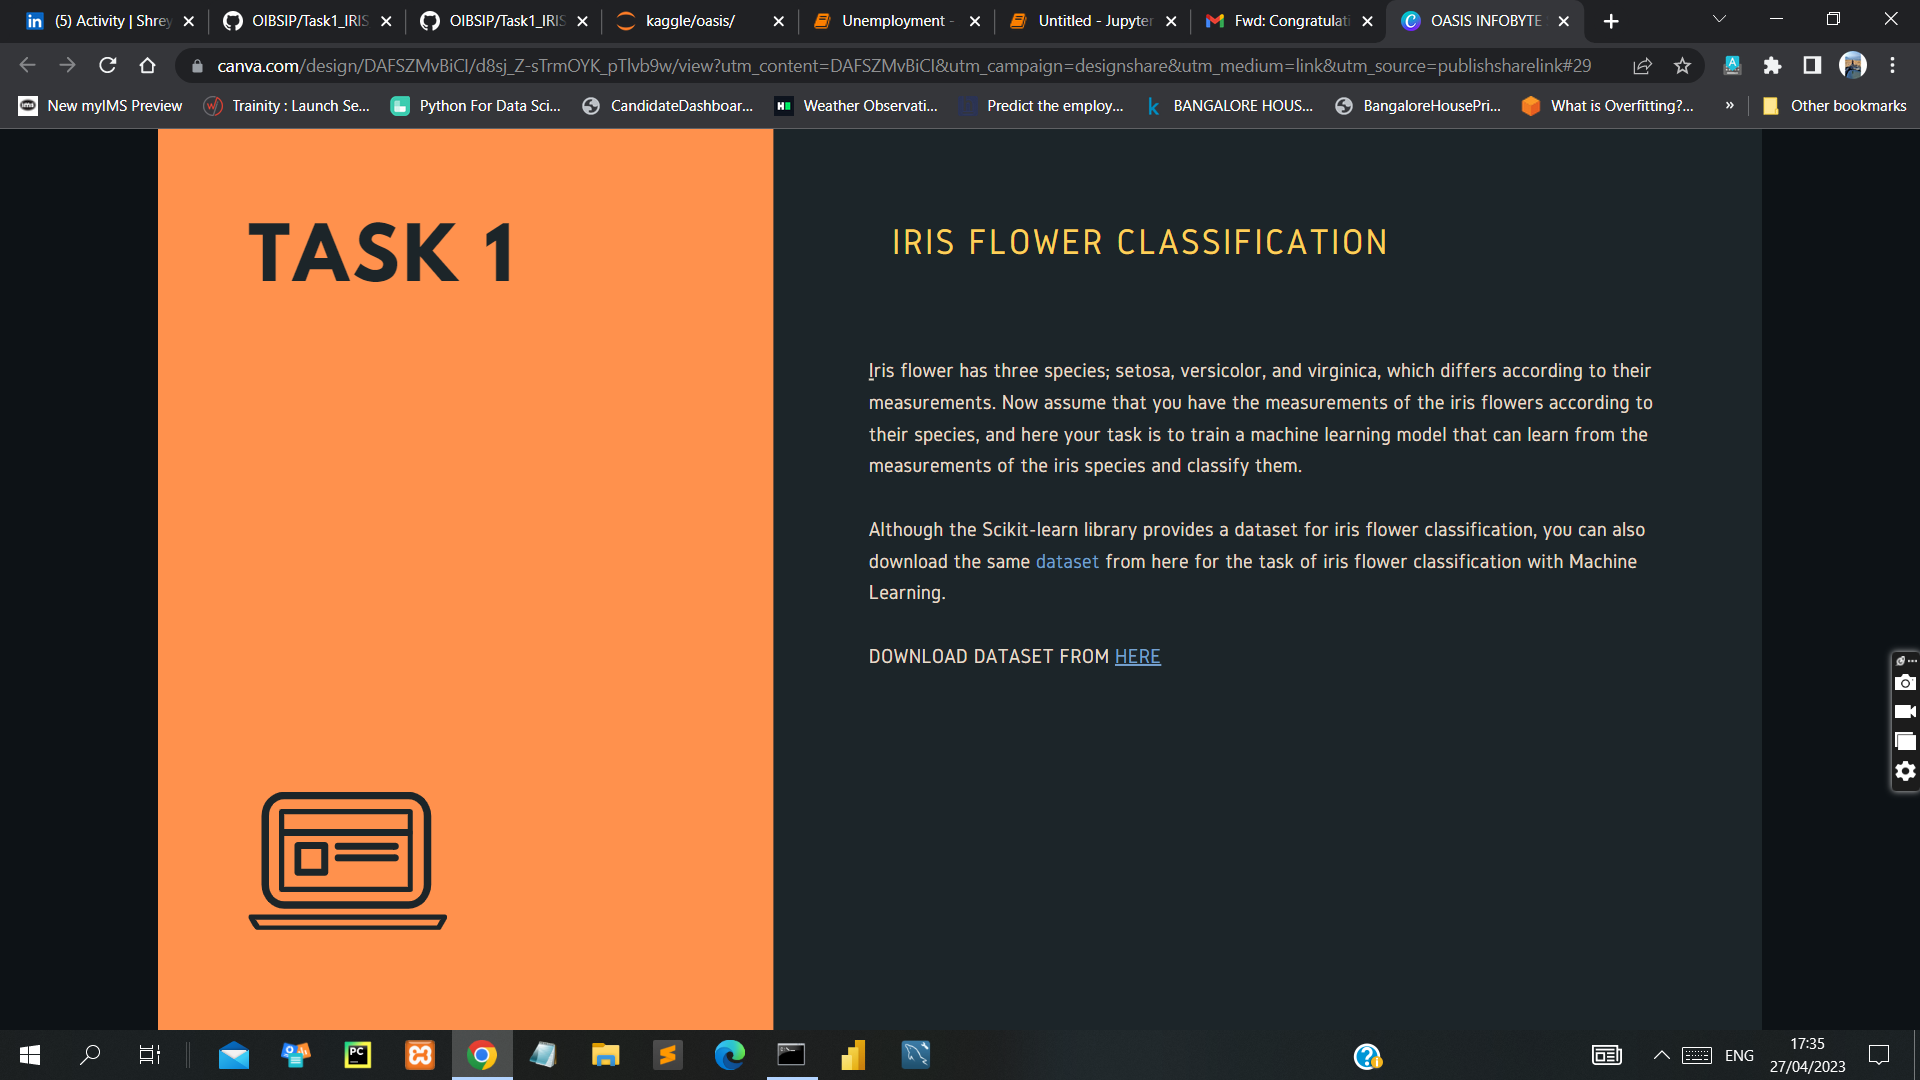

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("Iris.csv");
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
df.shape

(150, 6)

In [31]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

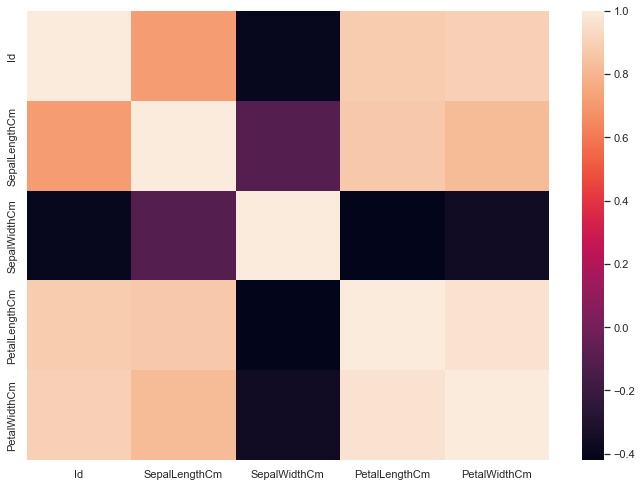

In [33]:
cm = df.corr()
sns.heatmap(cm)

In [15]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**All species are equally distributed: 50**

In [42]:
df['SepalLengthCm'].mean()

5.843333333333334

In [43]:
df['SepalWidthCm'].mean()

3.0540000000000003

In [44]:
df['PetalLengthCm'].mean()

3.758666666666666

In [46]:
df['PetalWidthCm'].mean()

1.1986666666666668

**Conclusion: 
The mean of Sepal Length is 5.84
The mean of Sepal Width is 3.05
The mean of Petal Length  is 3.75
The mean of Petal Width is 1.19**

<function matplotlib.pyplot.show(close=None, block=None)>

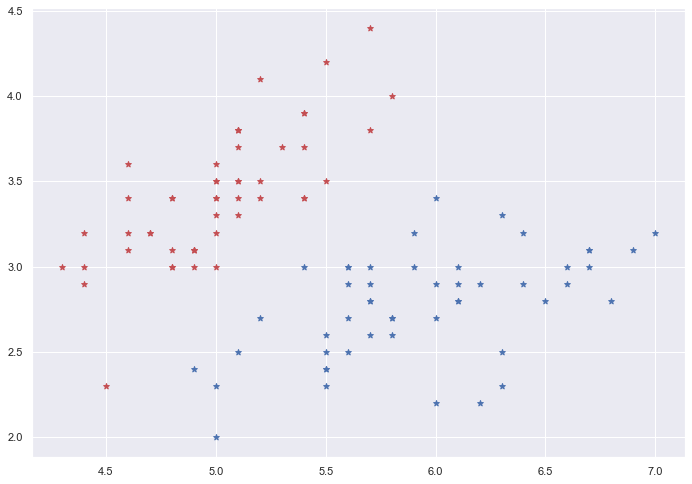

In [52]:
df1 = df[df['Species']=='Iris-setosa']
df2 = df[df['Species']=='Iris-versicolor']
plt.scatter(df1['SepalLengthCm'],df1['SepalWidthCm'],color='r',marker='*')
plt.scatter(df2['SepalLengthCm'],df2['SepalWidthCm'],color='b',marker='*')
plt.show

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

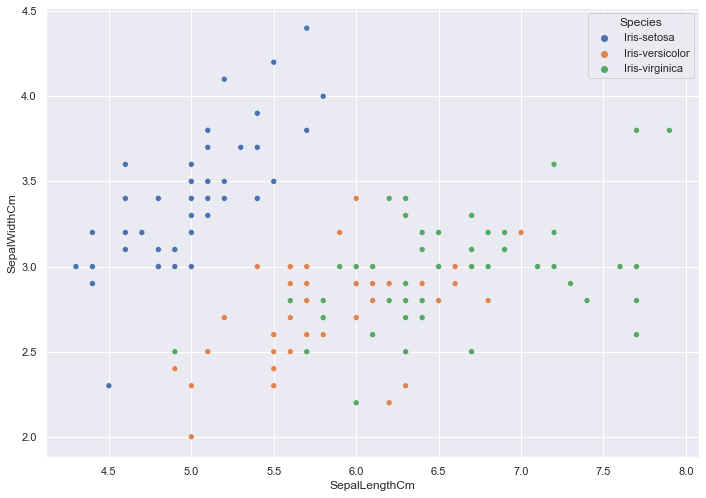

In [53]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df,hue='Species')

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Count'>

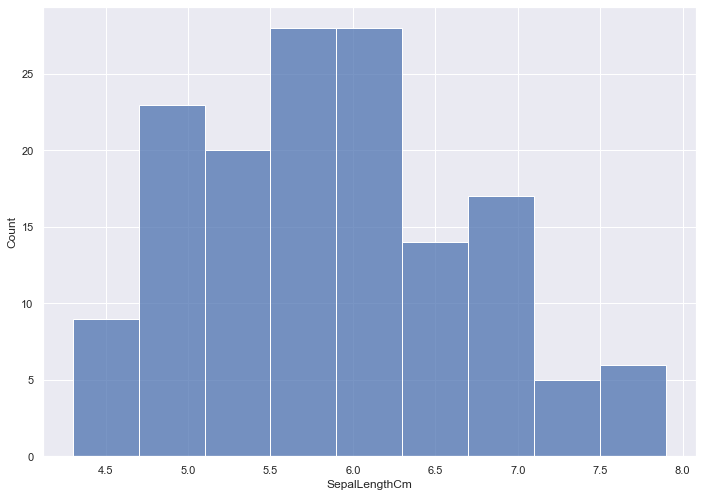

In [57]:
sns.histplot(data=df, x="SepalLengthCm")

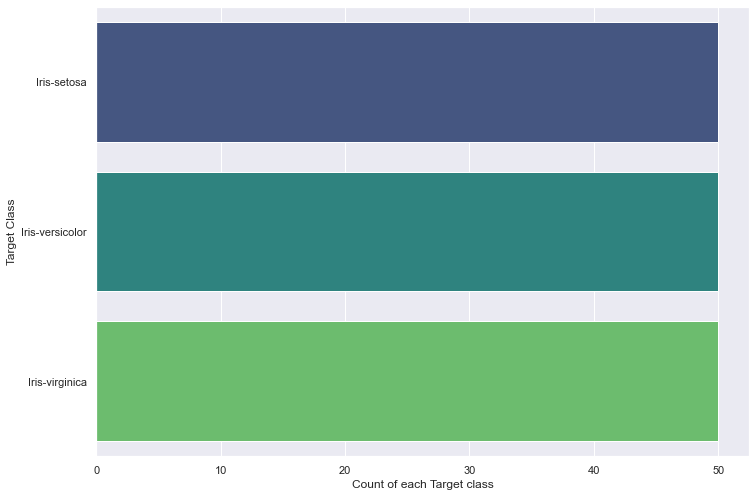

In [16]:
sns.countplot(y = 'Species', data = df, palette="viridis")
plt.xlabel("Count of each Target class")
plt.ylabel("Target Class")
plt.show()

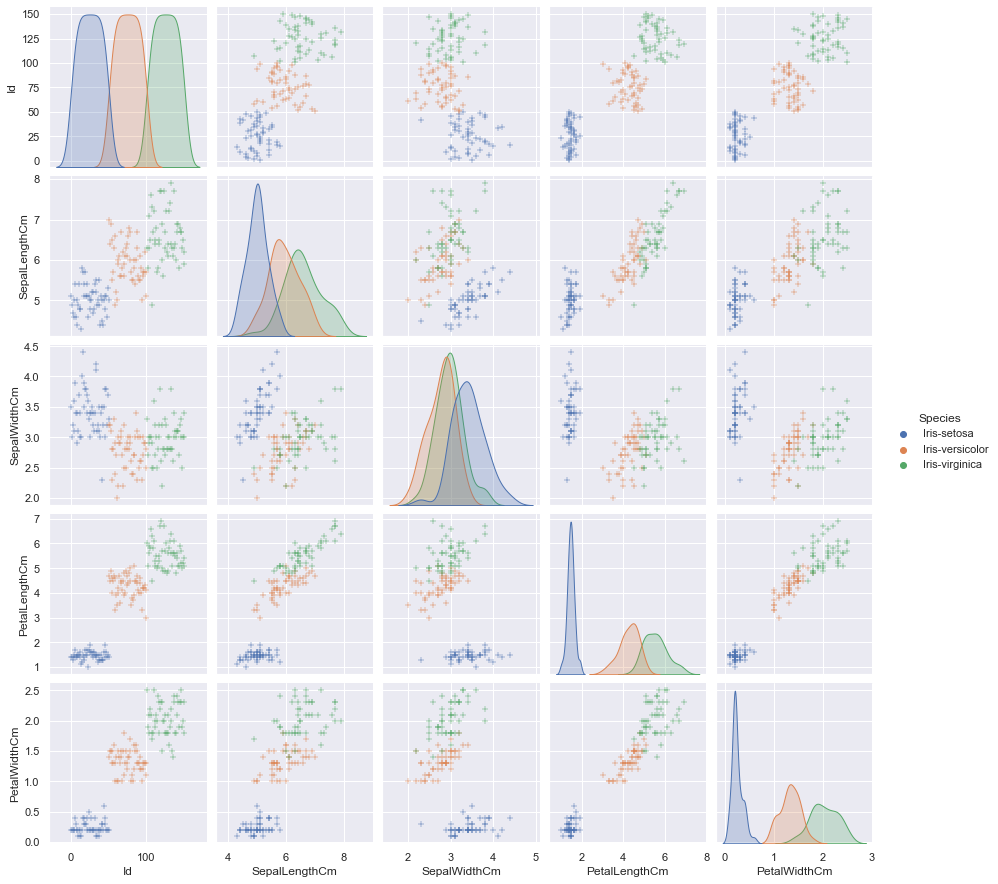

In [17]:
sns.pairplot(df, hue='Species', markers='+')
plt.show()

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

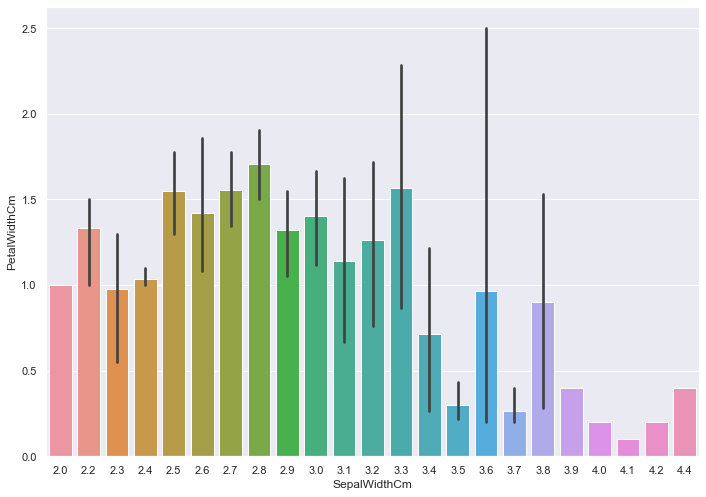

In [18]:
sns.barplot(data=df, x='SepalWidthCm', y='PetalWidthCm')

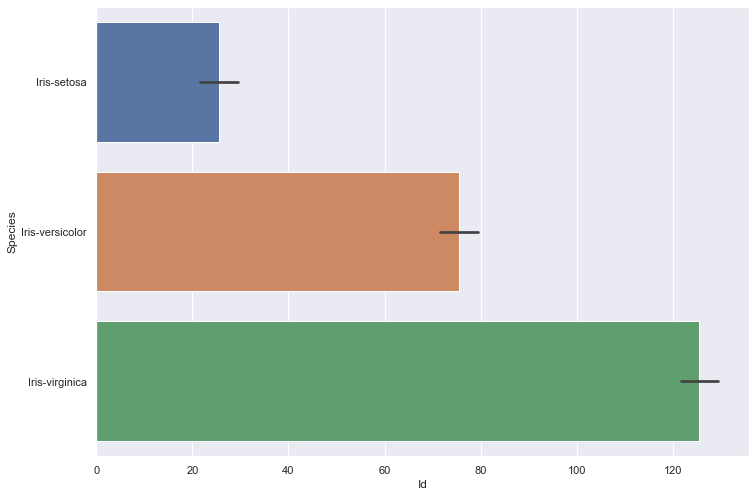

In [19]:
sns.barplot(data=df, x='Id', y='Species');

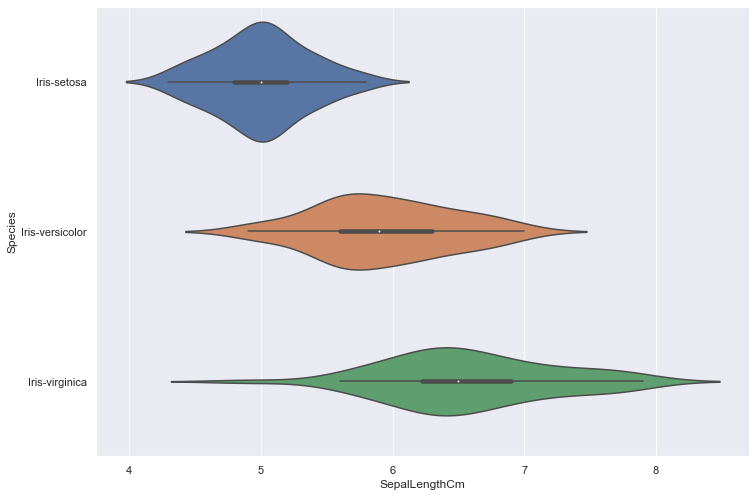

<Figure size 720x1440 with 0 Axes>

In [36]:
sns.violinplot(df['SepalLengthCm'],df['Species'])
plt.figure(figsize =(10, 20))
plt.show()

In [20]:
X = df.drop(['Species'], axis=1)
y = df['Species']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 5) | y shape: (150,) 


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=11,test_size=0.2)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
knn_model.score(X_test,y_test)

1.0

In [29]:
from sklearn.naive_bayes import BernoulliNB
clf1 = BernoulliNB()
clf1.fit(X_train,y_train)

BernoulliNB()

In [30]:
clf1.score(X_test,y_test)

0.3

In [25]:
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB()
clf2.fit(X_train,y_train)

GaussianNB()

In [26]:
clf2.score(X_test,y_test)

1.0

# Conclusion

We can observe that KNeighborsClassifier is giving us 100% accuracy!

while **Bernoulli Naive Bayes** predicts only **30%** 

and **100%** of Accuracy is predicted by **Gaussian Naive Bayes**